# Neural Networks with Keras: Abalone Example

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# from __future__ import print_function
# import random
# import numpy as np
# import pandas as pd
# from math import sin

# # pip install keras
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation
# from keras.optimizers import SGD   # Stochastic Gradient Descent

# from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
# import sklearn.cross_validation as cv

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (8, 8)

## Classification, Example 1: Iris Dataset

We'll start with the Iris dataset (of course).

In [5]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [13]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(4, input_dim=4, activation='tanh'))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=4, output_dim=3, activation='softmax'))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer='adam')

C:\Users\alasseter\AppData\Local\Continuum\anaconda3\envs\my-keras-env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="softmax", units=3)`
  if sys.path[0] == '':


In [14]:
# Train the model

loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=500, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration

Instructions for updating:
Use tf.cast instead.


C:\Users\alasseter\AppData\Local\Continuum\anaconda3\envs\my-keras-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


0.01712975891272503


In [16]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', metrics.accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', metrics.confusion_matrix(y, preds))

ACCURACY:  0.98
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]


Text(0.5, 1.0, 'MSE by Epoch')

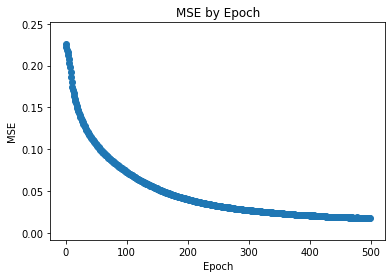

In [17]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Classification, Example 2: Abalone data set

In [42]:
df = pd.read_csv("../data/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [47]:
# Convert sex from string to numeric.
df["Sex"]=df['Sex'].map({'M':0, 'F':1, 'I':2})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [48]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [49]:
X = df.drop('Sex', axis=1)
y = df["Sex"]
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [50]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=8, output_dim=6, activation='tanh'))

#Second, hidden layer
model.add(Dense(input_dim=6, output_dim=6, activation='tanh'))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=6, output_dim=3, activation='softmax'))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\alasseter\AppData\Local\Continuum\anaconda3\envs\my-keras-env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=8, activation="tanh", units=6)`
  
C:\Users\alasseter\AppData\Local\Continuum\anaconda3\envs\my-keras-env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=6, activation="tanh", units=6)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\alasseter\AppData\Local\Continuum\anaconda3\envs\my-keras-env\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=6, activation="softmax", units=3)`
  from ipykernel import kernelapp as app


In [51]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=500, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   
print("Training complete")

Training...
0.16976645071952384
Training complete


In [52]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', metrics.accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', metrics.confusion_matrix(y, preds))
print('CONFUSION MATRIX:\n', metrics.confusion_matrix(y, preds))

ACCURACY:  0.5709839597797463
CONFUSION MATRIX:
 [[1116  234  178]
 [ 902  312   93]
 [ 360   25  957]]
CONFUSION MATRIX:
 [[1116  234  178]
 [ 902  312   93]
 [ 360   25  957]]


Text(0.5, 1.0, 'MSE by Epoch')

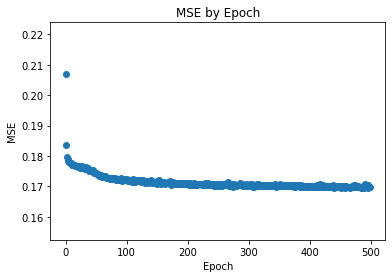

In [53]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')